# Bond Biography: Louisiana Purchase

In [15]:
import pandas as pd
import numpy as np
import calendar as cal
import matplotlib.pyplot as plt



## Overview: 
The Louisiana Six Per Cent. Stock was issued in order to fund much of the $15,000,000 (80 million francs) Louisiana Purchase, comprising 828,000 square miles of land. This land now forms  parts or the entirety of fifteen different U.S. states. 


The United States ultimately issued $11.25 million in bonds. 

## Historical Context

In the early nineteenth century, Napoleon's military conquest of Europe was underway. These military endeavors required significant funding, and during wartime, tariff revenues suffered and were exhausted, necessitating external funding. Parting with the Louisiana Territories emerged as the best means for securing the required funds, quickly. However, the question arose: who had tens of millions of Francs readily available?

## The Deal

On April 30th, 1803, the United States and France reached a threefold agreement. Firstly, there was the formal cession* of the Louisiana Territory. Secondly, the United States committed 60 million Francs to France, fixing a $5⅓ Franc-Dollar Exchange Rate, and issuing $11.25 million in bonds at a 6% annual interest rate, **payable in Paris, London, or Amsterdam** (this last fact is crucial, and will be revisited). Thirdly, the United States agreed to assume $3.75 million in debt that France owed to US merchants (Neal).

But the Louisiana Purchase did not end here. Even if the United States were to issue $11.25 million worth of bonds, there was no guarantee that the bonds would be purchased quickly, and Napoleon desired funds as soon as possible. The United States, or any nation, was unwilling/unable to directly pay France that much, either.

*France did not give up ownership of the land, but rather their own claim, which they recently won from France. Native Americans still owned much of the Louisiana Territory.

## Baring and Hope's Agreement with the French Republic

Since France did not want take the chance of waiting for bonds to sell, and the United States also wanted to do what they could in order to receive the Louisiana Territories, both parties sought a third party. It just so happened that Francis Baring of Baring and Co. was in Paris in 1803!

After negotiations, the French Republic struck a deal with two banks, Baring & Co. and Hope and Co., "for underwriting the stock to be issued by the United States in settlement of the Louisiana Purchase." France transferred full possession of the $11.25 million in US bonds to these two banks. Consequently, Baring & Co. and Hope & Co. were responsible for paying France the $11.25 million, instead of the United States. The two banks negotiated a deal with France to pay 52 million Francs ($9.75 million dollars, taking a 13⅓% commission) over the course of two years. The payment schedule stipulated that 6 million Francs were to be paid in the first month after Baring received the US bonds, with 2 million Francs being paid monthly for the next 23 months (Neal).

In effect, the two banks purchased the Louisiana Territories from France, and resold them to the United States. This was unlike any other purchase of land in US history, as each of the Purchase of Floridas, Gadsden Purchase, and Alaska purchase were directly serviced in dollars. 

The United States effectively secured a long-term loan from the two banks, paying semi-annual interest for 15 years, with the principal amount due only after 15 years.

In [5]:
BondData = pd.HDFStore("Data/BondDF.h5", mode="r")
print(BondData)

BondList = BondData["BondList"]
BondQuant = BondData["BondQuant"]
BondPrice = BondData["BondPrice"]
BondData.close()

<class 'pandas.io.pytables.HDFStore'>
File path: Data/BondDF.h5



## Features of the bond:

* **Authorization Date**: November 10th, 1803
* **Amount Authorized**: $11.25 million
* **Issue Date**: March 31st, 1804, issued at par
* **Term of Loan**: 15 years
* **Final Maturity Date**: October 23rd, 1823
* **Coupon Rate**: 6%, paid semi-annually
* **Principal Value**: Bonds were issued with principal values ranging from $100 to $6,000
* **Principal Repayment**: 15 years after issuance, $11.25 million was paid in four annual installments
* **Call Features**: Bond was not callable

## The United States' role:

Since the two banks took on the role of paying France, that left the United States effectively taking a long-term loan from the two banks. The United States was only required to repay the $11.25 million after 15 years, in four annual payments of $2.8125 million. Thus, the bonds were fully paid down 19 years after issuance.

With respect to interest payments, the United States paid semi-annual interest to Baring & Co. and Hope & Co. for the duration of the 15 year term. 

Crucially, both banks were at full liberty to resell these bonds, payable in London, Paris, and Amsterdam, while paying interest in local currencies (Neal). 

In [7]:
def is_nan(value):
    return pd.isna(value)

def get_cf_as_string(row):
    for i in range(1, 13):
        if row[f"CF{str(i).zfill(2)}"] > 0:
            return cal.month_name[i]
    if row["Ambiguous"] > 0:
        return "Ambiguous"
    return "N/A"


def summarize_bond(bond_row):
    noi = bond_row.get("Treasury's Name Of Issue", 'Unknown')
    issue_date = bond_row.get('First Issue Date', 'Unknown')
    term = bond_row.get("Term Of Loan", 'No term specified')
    redeemable = bond_row.get('Redeemable After', 'N/A')
    payable = bond_row.get('Payable', 'N/A')
    coupon = bond_row.get('Coupon Rate', 'N/A')
    frequency = f"{bond_row.get('Coupons Per Year', 'N/A')}"
    callable = 'Yes' if bond_row.get('Callable', 0) == 1.0 else 'No'
    coin = 'Yes/Unspecified' if bond_row.get('Coin', 0) > 0 else 'No'
    scheduled_month = get_cf_as_string(bond_row)
    
    bio = f"""
    Bond #{bond_row.get('Issue L1 ID', 'Unknown')}: {noi}
    Issued: {issue_date}
    Term: {term}
    Coupon Rate: {coupon}%
    Frequency: {frequency} times per year
    Callable: {callable}
    Coin: {coin}
    """
    print(bio)

LPBond2 = BondList[BondList["Treasury's Name Of Issue"].str.contains('Louisiana', na=False)]

LPBond2.apply(summarize_bond, axis=1)

# BondList.loc[20044] For full bond info


    Bond #44: Louisiana Six Per Cent. Stock 
    Issued: 1804-03-31 00:00:00
    Term: 15 years
    Coupon Rate: 6.0%
    Frequency: 4.0 times per year
    Callable: No
    Coin: Yes/Unspecified
    


L1 ID
20044    None
dtype: object

## Secondary Markets

December 21st, 1803, Alexander Baring requests the United States to issue stock in certain denominations, with specific people written on the stock. United States agrees, thus giving full control of the stock to the two banks.

The two banks began reselling the bonds in 1804, leaving only $4 million's worth on their balance sheet within a year. Dividends were payable in pound sterling in London, Francs in Paris, and Dutch guilders in Amsterdam (Archive). The marketing of the numerous bonds in their various denominations was left to the brokers employed by the various merchant banks in Amsterdam and London. Hope and Co. employed strategic marketing techniques to ensure the bonds' success. The banks' profit margins were also a significant factor in the bonds' marketability.

Baring and Co. effectively sold many partial certificates for 5.5% interest, less than the 6% the United States was paying them. The 0.5% interest difference was taken as a fee, and in some cases used to buy back bonds. Because the bonds were broken down via the partial certificates into lower denominations, broader classes of people were able to purchase the bonds (Archive).

## Distribution of Bonds 

Of the $11.25 million worth of bonds issued by the United States (Winston),

##### 2640 bonds, amounting to $5,000,000, were directly sent to Baring and Co. in London:

* 200 bonds sold for $200 each, amounting to $40,000
* 200 bonds sold for $400 each, amounting to $80,000
* 200 bonds sold for $600 each, amounting to $120,000
* 400 bonds sold for $800 each, amounting to $320,000
* 500 bonds sold for $1,200 each, amounting to $600,000
* 500 bonds sold for $2,000 each, amounting to $1,000,000
* 200 bonds sold for $3,000 each, amounting to $600,000
* 200 bonds sold for $4,000 each, amounting to $800,000
* 240 bonds sold for $6,000 each, amounting to $1,440,000


##### 2431 bonds, amounting to $6,250,000, were directly sent to Hope and Co. in Amsterdam:

* 50 bonds sold for $100 each, amounting to $5,000
* 100 bonds sold for $500 each, amounting to $50,000
* 50 bonds sold for $800 each, amounting to $40,000
* 500 bonds sold for $1,000 each, amounting to $500,000
* 500 bonds sold for $2,000 each, amounting to $1,000,000
* 500 bonds sold for $3,000 each, amounting to $1,500,000
* 500 bonds sold for $4,000 each, amounting to $2,000,000
* 231 bonds sold for $5,000 each, amounting to $1,155,000

In [10]:
#Initialize
bond_id = 20044
first_issue_date = pd.Timestamp("1804-03-31")

In [11]:
def plot_quantities(bond_id):
    plt.figure(figsize=(10, 6))
    series = BondQuant.transpose().loc[(bond_id, 'Public Holdings')]
    series = series[series.notna()]
    ax = series.plot.line(title="Louisiana Purchase Bond Quantities",
                          legend=True, xlabel="Time", ylabel="Quantity of Bonds", marker='.')
    plt.axvline(first_issue_date, color="black", alpha=0.25)
    plt.annotate("First Issue Date", (first_issue_date, series.min()), xycoords="data", rotation=90)
    plt.legend(labels=[str(bond_id)])
    plt.xlim(series.index.min(), pd.Timestamp("1823-12-31"))
    plt.show()

In [12]:
def plot_prices(bond_id):
    plt.figure(figsize=(10, 6))
    if not isinstance(BondPrice.columns, pd.MultiIndex):
        BondPrice.columns = pd.MultiIndex.from_tuples(BondPrice.columns)

    bond_price_series = BondPrice.xs(bond_id, level='L1 ID', axis=1)
    bond_price_series_clean = pd.to_numeric(bond_price_series['Average'], errors='coerce').dropna()

    ax = bond_price_series_clean.plot.line(title=f"Average Price of Louisiana Purchase Bond",
                                           xlabel="Time", ylabel="Price", marker='.')
    plt.axvline(first_issue_date, color="black", alpha=0.25)
    plt.annotate("First Issue Date", (first_issue_date, bond_price_series_clean.min()), xycoords="data", rotation=90)
    plt.legend(labels=[str(bond_id)])
    plt.show()

## Graph Trends and Notable Events

The first figure below plots the total quantity of bonds outstanding over time, beginning at $11.25 million. This tells us little about the United States' role in the bond market, as the two banks were responsible for reselling and paying down the bonds. The first bonds were redeemed in September, 1812, with final redemption occurring October, 1823. 

The second figure plots the average price of the bonds over time. The bonds evidently traded near par for much of their lifetime, with a significant but short-lived drop beginning in 1814. 

While assigning specific events to variations in bond prices is difficult to do rigorously, there were several notable events that occurred during the life of the bond. 

From 1815-1817, the post War of 1812 recovery and robust growth enabled faith in the United States to meet their obligations, despite volatile prices. From 1817-1820, the bond price had stabilized, possibly reflecting normal times. 

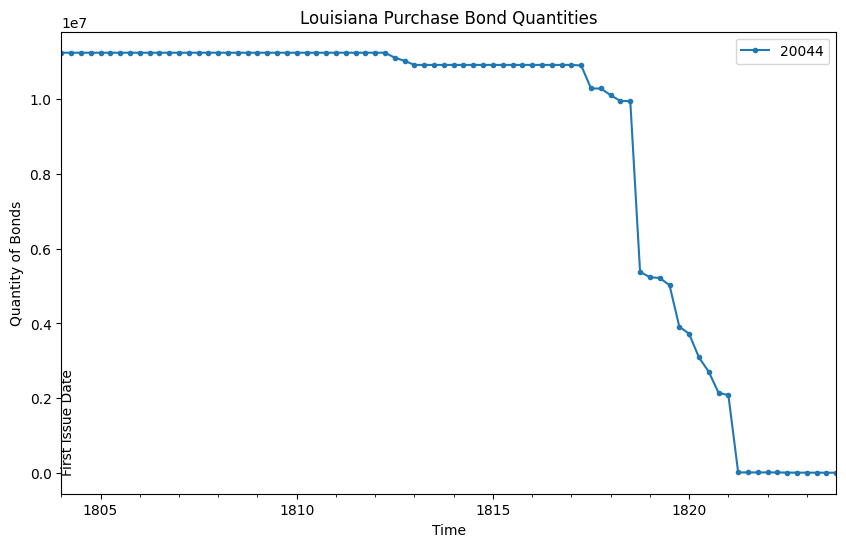

In [13]:
plot_quantities(bond_id)

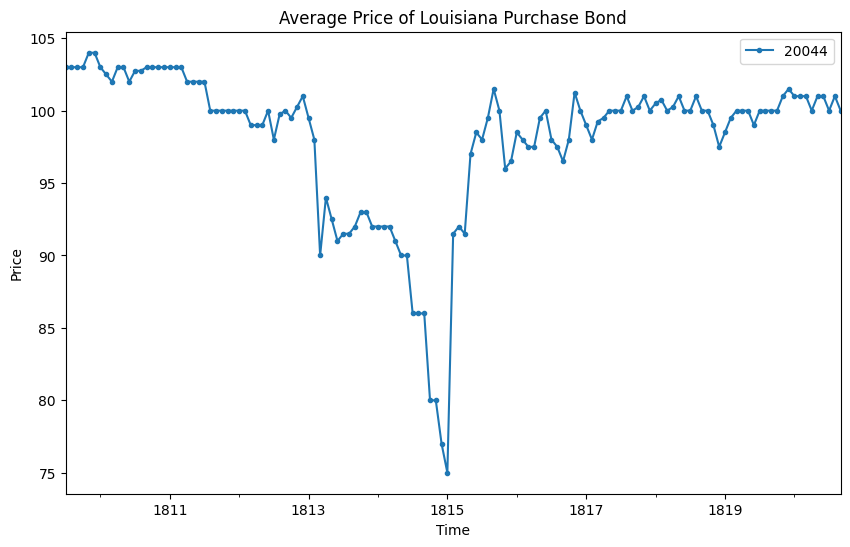

In [14]:
plot_prices(bond_id)

## Implications and Concluding Thoughts

The success of the Louisiana Purchase sent ripples globally. Since interest was payable in London, Paris, and Amsterdam, market participants were able to witness the banks' faith in the United States in real time, and the United States' ability to meet their obligations. 

Each bond, redeemed in Amsterdam, London, or Paris, had written on it: "An Act authorizing the creation of a Stock to the amount of eleven millions two hundred and fifty thousand dollars." In effect, the entire world witnessed the United States take out immense amounts of debt, and pay it back in full and on time. Source: https://lewis-clark.org/media/loupur_stock-certif.jpg

To contextualize the magnitude of the Louisiana Purchase, the US had an outstanding debt of $80 million, and effectively increased its debt by 19% to finance this deal! In today's terms, that would be like the United States taking out ~$6.5 trillion in debt, given the current debt being ~$34.5 trillion.

Furthermore, when interest payments began in 1804, total government revenue was $11.83 million, so financing the Louisiana Purchase amounted to 95% of the US' annual revenue. In an era with no robust income tax systems, and despite declining tariff revenues during the War of 1812, interest payments were made in full and on time. The United States successfully borrowed as much as its yearly revenue!

This marked the first time sovereign debts were not just used as debt or collateral, but as a means of payment, since the United States purchased the Louisiana Territory with no immediate payment. This deal laid the groundwork for US debt playing a massive role in the global economy, demonstrating debt's potential money-like properties.

Estimates of the two banks' profit range from $1.5 million (Archive) to $3 million, estimated by Secretary of Treasury Albert Gallatin (Ziegler).

## Tangential Stories

* The two banks had sent 17.5 million Francs before the United States had sent them any bonds. Although the banks were only required to begin payments after receiving the bonds, they had full faith in the United States.

* A British bank was sending 2 million Francs a month to a country Britain was at war with. Did the British government take issue? Of course!! Henry Addington, the Prime Minister himself, wrote to the banks asking them to not honor the deal. The banks kindly declined, and proceeded to make great profit (Archive).

* In 1811, the listing of these bonds on the London Stock Exchange marked the first time foreign government bonds were listed on a stock exchange.

* The success of Baring & Co. and Hope & Co. set the stage for the Rothschild brothers to later achieve massive success in selling sovereign bonds. From the Louisiana Purchase onwards, sovereign debts' role in the global economy only grew.

* What the US ended up paying France/the two banks was only a fraction of the cost of the Louisiana Purchase. Most of the cost consisted of a mix of treaties with and violence against Native Americans, who were settled in the Louisiana Territory. When France ceded the land, which they'd recently receieved from Spain, they only ceded their claim, not the land itself.


## References
Neal, L. (2024). The Forgotten Financiers of the Louisiana Purchase. In Palgrave studies in the history of finance. https://doi.org/10.1007/978-3-031-56277-8

Team, H. a. R. (2023, April 5). The Louisiana Purchase and the Birth of American High Finance. Howe & Rusling. https://www.howeandrusling.com/the-louisiana-purchase-and-the-birth-of-american-high-finance/

The Louisiana Purchase - The Baring Archive. (n.d.). The Baring Archive. https://baringarchive.org.uk/exhibition/the-louisiana-purchase/

Winston, James E. and Robert W. Columb (1929). “How the Louisiana Purchase Was Financed.” Louisiana Historical Quarterly 12: 189–237

Ziegler, P. (1988). The Sixth Great Power: Barings 1762-1929. http://ci.nii.ac.jp/ncid/BA45761761

